In [1]:
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np

In [2]:
columns_test = ["Id","Room","Price","Size","Floor","FloorsTotal"]
train_100 = pd.read_csv('train_100.csv', sep=",")

In [3]:
train_100.describe()

,Id,Room,Price,Size,Floor,FloorsTotal
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,50.500000,3.040000,5.797650e+07,113.600000,8.610000,15.320000
std,29.011492,1.469694,6.877170e+07,73.347795,10.907226,14.017939
min,1.000000,1.000000,5.210000e+06,29.000000,1.000000,2.000000
25%,25.750000,2.000000,1.000500e+07,58.500000,2.000000,6.750000
50%,50.500000,3.000000,2.092000e+07,83.500000,5.000000,12.000000
75%,75.250000,5.000000,8.459500e+07,161.000000,12.000000,18.000000
max,100.000000,5.000000,2.885400e+08,326.000000,58.000000,73.000000


In [4]:
train_100.head(10)

,Id,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,1,5,210020000,198,балкон,1,2,NaN,вторичка,NaN,Сокол,САО
1,2,2,17630000,64,NaN,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,3,5,142400000,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,4,5,142520000,265,NaN,5,5,кирпичный,вторичка,NaN,Басманный,ЦАО
4,5,3,34070000,88,NaN,10,42,монолитный,вторичка,грузовой,Хорошевский,САО
5,6,1,7660000,35,балкон,9,10,NaN,вторичка,пассажирский,Академический,ЮЗАО
6,7,5,63090000,161,NaN,3,6,кирпичный,вторичка,пассажирский,Красносельский,ЦАО
7,8,5,228630000,295,балкон,4,6,NaN,вторичка,грузовой,Раменки,ЗАО
8,9,5,68280000,311,NaN,14,20,NaN,вторичка,грузовой,Можайский,ЗАО
9,10,5,47030000,118,балкон,3,6,NaN,вторичка,пассажирский,Хамовники,ЦАО


In [5]:
train_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           100 non-null    int64 
 1   Room         100 non-null    int64 
 2   Price        100 non-null    int64 
 3   Size         100 non-null    int64 
 4   Balcony      52 non-null     object
 5   Floor        100 non-null    int64 
 6   FloorsTotal  100 non-null    int64 
 7   Walls        54 non-null     object
 8   Age          100 non-null    object
 9   Lift         83 non-null     object
 10  District     100 non-null    object
 11  Okrug        100 non-null    object
dtypes: int64(6), object(6)
memory usage: 9.5+ KB


In [6]:
X = np.array(train_100.drop(["Id","Price"], axis=1))
y = np.array(train_100["Price"])
X

array([[5, 198, 'балкон', 1, 2, nan, 'вторичка', nan, 'Сокол', 'САО'],
       [2, 64, nan, 3, 8, 'монолитный', 'вторичка', 'грузовой', 'Зюзино',
        'ЮЗАО'],
       [5, 161, 'балкон', 7, 7, 'кирпичный', 'вторичка', 'пассажирский',
        'Пресненский', 'ЦАО'],
       [5, 265, nan, 5, 5, 'кирпичный', 'вторичка', nan, 'Басманный',
        'ЦАО'],
       [3, 88, nan, 10, 42, 'монолитный', 'вторичка', 'грузовой',
        'Хорошевский', 'САО'],
       [1, 35, 'балкон', 9, 10, nan, 'вторичка', 'пассажирский',
        'Академический', 'ЮЗАО'],
       [5, 161, nan, 3, 6, 'кирпичный', 'вторичка', 'пассажирский',
        'Красносельский', 'ЦАО'],
       [5, 295, 'балкон', 4, 6, nan, 'вторичка', 'грузовой', 'Раменки',
        'ЗАО'],
       [5, 311, nan, 14, 20, nan, 'вторичка', 'грузовой', 'Можайский',
        'ЗАО'],
       [5, 118, 'балкон', 3, 6, nan, 'вторичка', 'пассажирский',
        'Хамовники', 'ЦАО'],
       [2, 44, nan, 7, 9, nan, 'вторичка', 'пассажирский', 'Вешняки',
        'ВА

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_ohe = ohe.fit_transform(X).toarray()
ohe.categories_

[array([1, 2, 3, 5], dtype=object),
 array([29, 30, 31, 33, 34, 35, 36, 37, 41, 44, 45, 46, 48, 50, 54, 55, 57,
        59, 61, 64, 65, 66, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 86, 87,
        88, 89, 90, 91, 93, 98, 102, 112, 116, 118, 121, 128, 130, 132,
        138, 142, 145, 146, 152, 156, 161, 170, 177, 189, 192, 196, 198,
        200, 201, 211, 218, 219, 220, 223, 226, 229, 235, 245, 249, 265,
        295, 311, 326], dtype=object),
 array(['балкон', 'лоджия', nan], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 38, 42, 48, 58], dtype=object),
 array([2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22,
        23, 24, 25, 30, 31, 35, 36, 39, 42, 64, 73], dtype=object),
 array(['блочный', 'кирпично-монолитный', 'кирпичный', 'монолитный',
        'панельный дом', nan], dtype=object),
 array(['вторичка', 'новостройка'], dtype=object),
 array(['грузовой', 'пассажирский', nan], dtype=object),
 array(['Академ

In [8]:
X_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y,random_state = 55,
                                                        test_size = 0.25)

In [10]:
import math
class RMSLE(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)

        result = []
        for index in range(len(targets)):
            val = max(approxes[index], 0)
            der1 = math.log1p(targets[index]) - math.log1p(max(0, approxes[index]))
            der2 = -1 / (max(0, approxes[index]) + 1)

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result
class RMSLE_val(object):
    def get_final_error(self, error, weight):
        return np.sqrt(error / (weight + 1e-38))

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += w * ((math.log1p(max(0, approx[i])) - math.log1p(max(0, target[i])))**2)

        return error_sum, weight_sum

In [103]:
model = CatBoostRegressor(iterations=3000,
                          early_stopping_rounds=100,
                          grow_policy = 'Depthwise',
                          depth=8,
                          loss_function=RMSLE(),
                          #cat_features= columns_test,
                          random_state=15,
                          l2_leaf_reg = 1,
                          learning_rate=0.03,
                          verbose=10,
                          eval_metric=RMSLE_val())
#params = {'l2_leaf_reg':[1,4,8],
#          'learning_rate': [0.03,0.5,0.1],
#          'depth':[6,8,10]
#         }
#grid_search_res = model.grid_search(params, full_features['items'][FTS_COLS], full_features['items'].target, train_size=0.8)

In [104]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Got unsafe target value = 1.011e+07 at object #0 of dataset learn


0:	learn: 16.9021483	total: 560ms	remaining: 27m 58s
10:	learn: 14.2303142	total: 577ms	remaining: 2m 36s
20:	learn: 13.0608588	total: 594ms	remaining: 1m 24s
30:	learn: 12.4783145	total: 609ms	remaining: 58.4s
40:	learn: 12.0760759	total: 625ms	remaining: 45.1s
50:	learn: 11.7623733	total: 640ms	remaining: 37s
60:	learn: 11.5549054	total: 655ms	remaining: 31.6s
70:	learn: 11.4114850	total: 672ms	remaining: 27.7s
80:	learn: 11.2669362	total: 689ms	remaining: 24.8s
90:	learn: 11.1764607	total: 707ms	remaining: 22.6s
100:	learn: 11.0132526	total: 723ms	remaining: 20.7s
110:	learn: 10.9169252	total: 739ms	remaining: 19.2s
120:	learn: 10.8346504	total: 758ms	remaining: 18s
130:	learn: 10.7352014	total: 793ms	remaining: 17.4s
140:	learn: 10.6610491	total: 828ms	remaining: 16.8s
150:	learn: 10.5847024	total: 859ms	remaining: 16.2s
160:	learn: 10.5122294	total: 883ms	remaining: 15.6s
170:	learn: 10.4497249	total: 899ms	remaining: 14.9s
180:	learn: 10.3659285	total: 916ms	remaining: 14.3s
190:

1620:	learn: 9.0073733	total: 4.11s	remaining: 3.5s
1630:	learn: 9.0038786	total: 4.13s	remaining: 3.47s
1640:	learn: 9.0004083	total: 4.14s	remaining: 3.43s
1650:	learn: 8.9969427	total: 4.16s	remaining: 3.4s
1660:	learn: 8.9935355	total: 4.17s	remaining: 3.36s
1670:	learn: 8.9901082	total: 4.19s	remaining: 3.33s
1680:	learn: 8.9866854	total: 4.2s	remaining: 3.29s
1690:	learn: 8.9832766	total: 4.21s	remaining: 3.26s
1700:	learn: 8.9798912	total: 4.22s	remaining: 3.23s
1710:	learn: 8.9764934	total: 4.24s	remaining: 3.19s
1720:	learn: 8.9731091	total: 4.26s	remaining: 3.16s
1730:	learn: 8.9697477	total: 4.27s	remaining: 3.13s
1740:	learn: 8.9664338	total: 4.29s	remaining: 3.1s
1750:	learn: 8.9630895	total: 4.32s	remaining: 3.08s
1760:	learn: 8.9597730	total: 4.34s	remaining: 3.06s
1770:	learn: 8.9564547	total: 4.37s	remaining: 3.03s
1780:	learn: 8.9531494	total: 4.39s	remaining: 3s
1790:	learn: 8.9498715	total: 4.41s	remaining: 2.98s
1800:	learn: 8.9465917	total: 4.43s	remaining: 2.95s


In [105]:
rmsle = RMSLE_val()
rmsle.evaluate(approxes=[y_pred], target=y_test, weight= None)

(1806.0125806650976, 25.0)

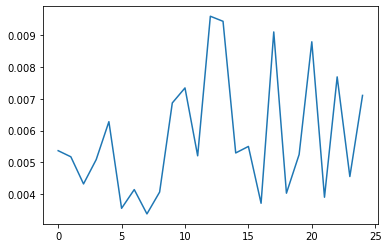

In [106]:
import matplotlib.pyplot as plt
plt.plot(y_pred*1e-6)

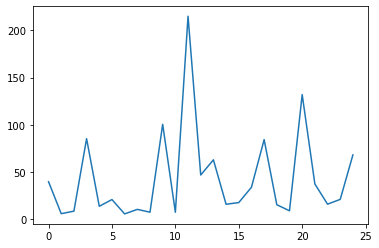

In [107]:

plt.plot(y_test*1e-6)

In [108]:
y_pred-y_test

array([-3.99146342e+07, -6.13482637e+06, -8.80568071e+06, -8.54449136e+07,
       -1.39637206e+07, -2.10664492e+07, -5.88585915e+06, -1.06866256e+07,
       -7.70593723e+06, -1.00643130e+08, -7.65265746e+06, -2.14924795e+08,
       -4.70203994e+07, -6.30805588e+07, -1.60847055e+07, -1.78845002e+07,
       -3.40662900e+07, -8.44608941e+07, -1.55959724e+07, -9.20475437e+06,
       -1.32061204e+08, -3.75961001e+07, -1.61823099e+07, -2.12554480e+07,
       -6.82728933e+07])

In [109]:
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker